In [3]:
# Figure Details (5-shot)
#                                              MI      |     CIFAR
#  Originals       
# Autoencoder                     imagenet_pretrained  | imagenet_pretrained
# AutoProtoNet                    mi-autoprotonet-5w5s | cifarfs-autoprotonet-5w5s
# Finetuned AutoProtoNet mi-pre-fine-autoprotonet-5w5s | cifarfs-pre-fine-autoprotonet-5w5s

In [4]:
import os
import torch
import random

from vis_prototypes import *

In [5]:
ckpt_dir = '/vulcanscratch/psando/checkpoints-meta/workshop_paper_checkpoints/'
ckpt_autoencoder = os.path.join(ckpt_dir, 'imagenet_pretrained')
ckpt_mi_autoprotonet = os.path.join(ckpt_dir, 'mi-autoprotonet-5w5s')
ckpt_cifarfs_autoprotonet = os.path.join(ckpt_dir, 'cifarfs-autoprotonet-5w5s')
ckpt_ft_mi_autoprotonet = os.path.join(ckpt_dir, 'mi-pre-fine-autoprotonet-5w5s')
ckpt_ft_cifarfs_autoprotonet = os.path.join(ckpt_dir, 'cifarfs-pre-fine-autoprotonet-5w5s')

val_epoch = 14
print('Val Epoch:', val_epoch)

way = 5
shot = 5
query = 5

# val epochs 8, 14, 24 look reasonable
data_support, labels_support, data_query, labels_query = support_query_data_labels('miniImageNet', way, shot, query, epoch=14)


Val Epoch: 14
Loading mini ImageNet dataset - phase train
Loading mini ImageNet dataset - phase val


/scratch0/slurm_906148/tmp-env/lib64/python3.6/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [6]:
c_data_support, c_labels_support, c_data_query, c_labels_query = support_query_data_labels('CIFAR_FS', way, shot, query, epoch=15)

Loading CIFAR-FS dataset - phase train
Loading CIFAR-FS dataset - phase val


In [7]:
mi_autoencoder, _ = get_model('AutoProtoNet', 'miniImageNet', ckpt_path=ckpt_autoencoder)
cifarfs_autoencoder, _ = get_model('AutoProtoNet', 'CIFAR_FS', ckpt_path=ckpt_autoencoder)
mi_autoprotonet, _ = get_model('AutoProtoNet', 'miniImageNet', ckpt_path=ckpt_mi_autoprotonet)
cifarfs_autoprotonet, _ = get_model('AutoProtoNet', 'CIFAR_FS', ckpt_path=ckpt_cifarfs_autoprotonet)
ft_mi_autoprotonet, _ = get_model('AutoProtoNet', 'miniImageNet', ckpt_path=ckpt_ft_mi_autoprotonet)
ft_cifarfs_autoprotonet, _ = get_model('AutoProtoNet', 'CIFAR_FS', ckpt_path=ckpt_ft_cifarfs_autoprotonet)

/scratch0/slurm_906148/tmp-env/lib64/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


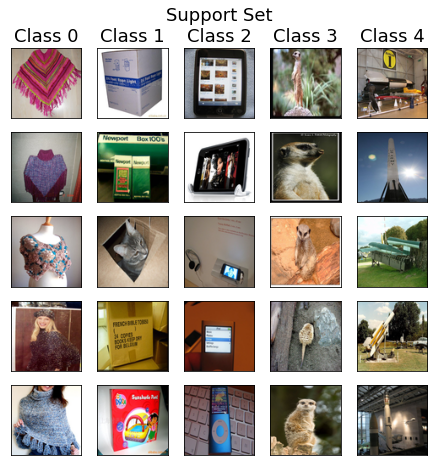

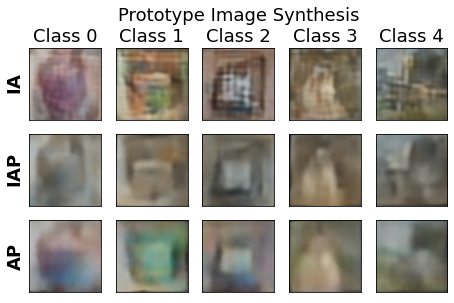

In [8]:
# Sort support data
sort_mi_support_indices = torch.argsort(labels_support)
mi_data_support = data_support[sort_mi_support_indices].cpu()

# Autoencoder, AutoProtoNet, and Pretrained AutoProtoNet
mi_autoencoder_prototypes = get_prototypes_imgs_from_data(mi_autoencoder, data_support.cuda(), labels_support, way, shot).cpu()
mi_autoprotonet_prototypes = get_prototypes_imgs_from_data(mi_autoprotonet, data_support.cuda(), labels_support, way, shot).cpu()
ft_mi_autoprotonet_prototypes = get_prototypes_imgs_from_data(ft_mi_autoprotonet, data_support.cuda(), labels_support, way, shot).cpu()

# Plot miniImageNet
original_rows = []
j = 0
for i in range(way):
    idx = [i for i in range(j, way*shot, way)]
    original_row = mi_data_support[idx]
    original_rows.append(original_row)
    j = j + 1
show_image_row(original_rows,
              tlist=[[f'Class {i}' if i != 2 else f'Support Set\nClass {i}' for i in range(way)], ['']*way, ['']*way, ['']*way, ['']*way],
              size=(1.5,1.5),
              fontsize=18)

show_image_row([mi_autoencoder_prototypes, ft_mi_autoprotonet_prototypes, mi_autoprotonet_prototypes],
               ylist=(['$\\bf{IA}$', '$\\bf{IAP}$', '$\\bf{AP}$']),
               tlist=[[f'Class {i}' if i != 2 else f'Prototype Image Synthesis\nClass {i}' for i in range(way)], ['']*way, ['']*way],
               size=(1.5,1.5),
               fontsize=18)

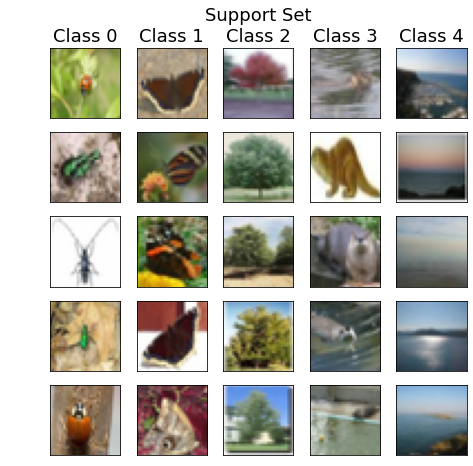

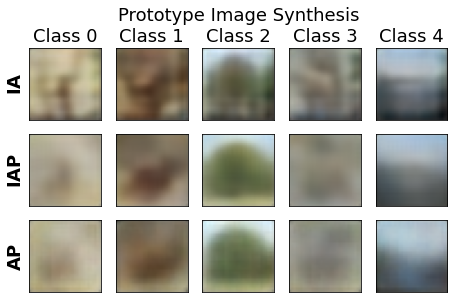

In [9]:
# Sort support data
sort_cifarfs_support_indices = torch.argsort(c_labels_support)
cifarfs_data_support = c_data_support[sort_cifarfs_support_indices].cpu()

# Autoencoder, AutoProtoNet, and Pretrained AutoProtoNet
cifarfs_autoencoder_prototypes = get_prototypes_imgs_from_data(cifarfs_autoencoder, c_data_support.cuda(), c_labels_support, way, shot).cpu()
cifarfs_autoprotonet_prototypes = get_prototypes_imgs_from_data(cifarfs_autoprotonet, c_data_support.cuda(), c_labels_support, way, shot).cpu()
ft_cifarfs_autoprotonet_prototypes = get_prototypes_imgs_from_data(ft_cifarfs_autoprotonet, c_data_support.cuda(), c_labels_support, way, shot).cpu()

# Plot CIFAR_FS
original_rows = []
j = 0
for i in range(way):
    idx = [i for i in range(j, way*shot, way)]
    original_row = cifarfs_data_support[idx]
    original_rows.append(original_row)
    j = j + 1
show_image_row(original_rows,
              ylist=[f'\n ' for i in range(way)],
              tlist=[[f'Class {i}' if i != 2 else f'Support Set\nClass {i}' for i in range(way)], ['']*way, ['']*way, ['']*way, ['']*way],
              size=(1.5,1.5),
              fontsize=18)

show_image_row([cifarfs_autoencoder_prototypes, ft_cifarfs_autoprotonet_prototypes, cifarfs_autoprotonet_prototypes],
               ylist=(['$\\bf{IA}$', '$\\bf{IAP}$', '$\\bf{AP}$']),
               tlist=[[f'Class {i}' if i != 2 else f'Prototype Image Synthesis\nClass {i}' for i in range(way)], ['']*way, ['']*way],
               size=(1.5,1.5),
               fontsize=18)